In [1]:
import pandas as pd
import joblib
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('messages.csv')
df.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
subject    2831 non-null object
message    2893 non-null object
label      2893 non-null int64
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


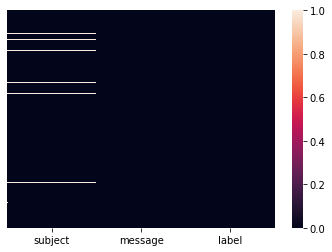

In [5]:
sns.heatmap(df.isnull(),  yticklabels=False)

In [6]:
df.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [7]:
df.fillna(df['subject'].mode().values[0],inplace=True)

subject    0
message    0
label      0
dtype: int64

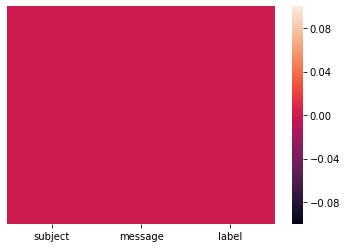

In [8]:
sns.heatmap(df.isnull(),  yticklabels=False)
df.isnull().sum()


In [9]:
df.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [10]:
df['sub_mssg']=df['subject']+df['message']
df.head()

,subject,message,label,sub_mssg
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j..."
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...


In [11]:
df['sub_mssg'].describe()

count                                                  2893
unique                                                 2876
top       re := 20 the virtual girlfriend and virtual bo...
freq                                                      4
Name: sub_mssg, dtype: object

In [12]:
df['length']=df['sub_mssg'].apply(len)
df.head()

,subject,message,label,sub_mssg,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,sociolinguistics,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,risk,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,request book information,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [13]:
df.drop('subject',axis=1,inplace=True)

df.head()

,message,label,sub_mssg,length
0,content - length : 3386 apple-iss research cen...,0,job posting - apple-iss research centercontent...,2895
1,"lang classification grimes , joseph e . and ba...",0,"sociolinguisticslang classification grimes , j...",1816
2,i am posting this inquiry for sergei atamas ( ...,0,query : letter frequencies for text identifica...,1485
3,a colleague and i are researching the differin...,0,riska colleague and i are researching the diff...,328
4,earlier this morning i was on the phone with a...,0,request book informationearlier this morning i...,1070


In [14]:
df['message'][0]

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [15]:
import re

In [16]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [17]:
mssg=decontact(df['message'][1])
mssg

'lang classification grimes , joseph e . and barbara f . grimes ; ethnologue language family index ; pb . isbn : 0-88312 - 708 - 3 ; vi , 116 pp . ; $ 14 . 00 . summer institute of linguistics . this companion volume to ethnologue : languages of the world , twelfth edition lists language families of the world with sub-groups shown in a tree arrangement under the broadest classification of language family . the language family index facilitates locating language names in the ethnologue , making the data there more accessible . internet : academic . books @ sil . org languages , reference lang & culture gregerson , marilyn ; ritual , belief , and kinship in sulawesi ; pb . : isbn : 0-88312 - 621 - 4 ; ix , 194 pp . ; $ 25 . 00 . summer institute of linguistics . seven articles discuss five language groups in sulawesi , indonesia ; the primary focus is on cultural matters , with some linguistic content . topics include traditional religion and beliefs , certain ceremonies , and kinship . 

In [18]:
#REPLACING NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')
df['sub_mssg'][0]

"job posting - apple-iss research centercontent - length : numbers apple-iss research center a us $ numbers million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statis

In [19]:
#CONVRTING EVERYTHING TO LOWERCASE
df['sub_mssg']=df['sub_mssg'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [20]:
df['sub_mssg']=df['sub_mssg'].str.replace(r'\d+(\.\d+)?', 'numbers')


df['sub_mssg']=df['sub_mssg'].str.lower()

df['sub_mssg']=df['sub_mssg'].str.replace(r'\n'," ") 

df['sub_mssg']=df['sub_mssg'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')

df['sub_mssg']=df['sub_mssg'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
df['sub_mssg']=df['sub_mssg'].str.replace(r'£|\$', 'Money')

df['sub_mssg']=df['sub_mssg'].str.replace(r'\s+', ' ')


df['sub_mssg']=df['sub_mssg'].str.replace(r'^\s+|\s+?$', '')

df['sub_mssg']=df['sub_mssg'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
df['sub_mssg']=df['sub_mssg'].str.replace(r"[^a-zA-Z0-9]+", " ")

In [21]:
df['sub_mssg'][0]

'job posting apple iss research centercontent length numbers apple iss research center a us money numbers million joint venture between apple computer inc and the institute of systems science of the national university of singapore located in singapore is looking for a senior speech scientist the successful candidate will have research expertise in computational linguistics including natural language processing and english and chinese statistical language modeling knowledge of state of the art corpus based n gram language models cache language models and part of speech language models are required a text to speech project leader the successful candidate will have research expertise expertise in two or more of the following areas computational linguistics including natural language parsing lexical database design and statistical language modeling text tokenization and normalization prosodic analysis substantial knowledge of the phonology syntax and semantics of chinese is required knowl

In [22]:
df['Cleaned_Text'] = df['sub_mssg']


In [23]:
df.drop('sub_mssg',axis=1,inplace=True)
df.drop('message',axis=1,inplace=True)

df.head()

,label,length,Cleaned_Text
0,0,2895,job posting apple iss research centercontent l...
1,0,1816,sociolinguisticslang classification grimes jos...
2,0,1485,query letter frequencies for text identificati...
3,0,328,riska colleague and i are researching the diff...
4,0,1070,request book informationearlier this morning i...


0    2412
1     481
Name: label, dtype: int64

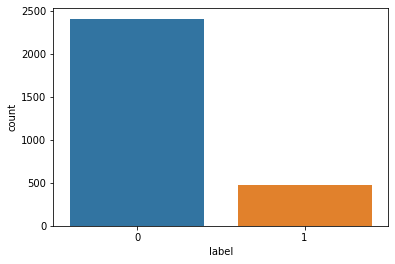

In [24]:
sns.countplot(x = "label", data = df)
df["label"].value_counts()


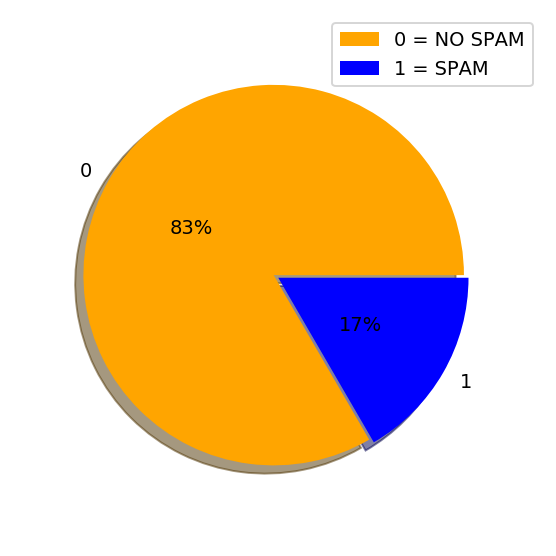

In [25]:
lb=df['label'].value_counts().index.tolist()
val=df['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [26]:
df.describe()

,label,length
count,2893.000000,2893.000000
mean,0.166263,3262.149326
std,0.372381,3655.249792
min,0.000000,36.000000
25%,0.000000,989.000000
50%,0.000000,2056.000000
75%,0.000000,4061.000000
max,1.000000,28672.000000


In [27]:

# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTE

In [28]:
# x=df['label'].values.reshape(-1, 1)
# y=df['Cleaned_Text'].values.reshape(-1, 1)


# smote=SMOTE(k_neighbors=1,sampling_strategy='minority')


In [29]:
# x_smote,y_smote=smote.fit_sample(x,y)

In [30]:
hamdf=df[df['label']==0]
spamdf=df[df['label']==1]


In [31]:
spamdf=spamdf.sample(hamdf.shape[0],replace=True)

final_dataframe=pd.concat([hamdf,spamdf],axis=0)

In [32]:
#sns.countplot(x = "label", data = final_dataframe)
final_dataframe["label"].value_counts()



1    2412
0    2412
Name: label, dtype: int64

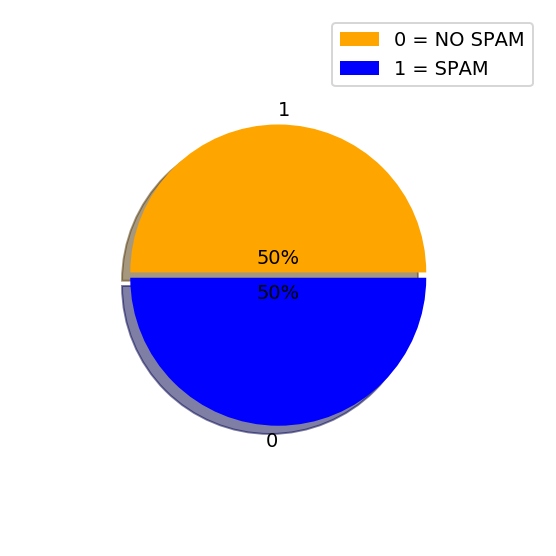

In [33]:
lb=final_dataframe['label'].value_counts().index.tolist()
val=final_dataframe['label'].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.1, shadow=True,radius=0.7)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(final_dataframe["Cleaned_Text"],final_dataframe["label"],test_size=0.2,random_state=20,shuffle=True,stratify=final_dataframe["label"])
Y_train.value_counts()
Y_test.value_counts()



1    483
0    482
Name: label, dtype: int64

In [56]:
# import time
# start=time.time()


# model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",SVC(C=1,gamma='auto'))])

# model.fit(X_train,Y_train)
# end=time.time()
# print(f"Training Time=={end-start}")

from sklearn.naive_bayes import BernoulliNB

import time
start=time.time()


model=Pipeline([('tfidf',TfidfVectorizer()),("Alg",BernoulliNB())])

model.fit(X_train,Y_train)
end=time.time()
print(f"Training Time=={end-start}")


Training Time==2.787863254547119


In [36]:
Y_pred=model.predict(X_test)


In [37]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)



array([[478,   4],
       [  2, 481]], dtype=int64)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       482
           1       0.99      1.00      0.99       483

    accuracy                           0.99       965
   macro avg       0.99      0.99      0.99       965
weighted avg       0.99      0.99      0.99       965



In [39]:
cnf=confusion_matrix(Y_test,Y_pred)

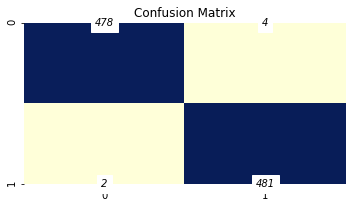

In [40]:
plt.figure(figsize = (5, 5))
annot_kws={'fontsize':10,'fontstyle':'italic','color':"k",'va':'center',"ha":'center','alpha':1,'backgroundcolor':'w'
}
sns.heatmap(pd.DataFrame(confusion_matrix(Y_test,Y_pred)),annot=True, cmap="YlGnBu" ,fmt="d",annot_kws=annot_kws,square=True,cbar=False)
plt.tight_layout()
plt.title("Confusion Matrix")
plt.ylabel=("Actual Labels")
plt.xlabel= ("Predicted Labels")
plt.show()

In [41]:
df1 = Y_pred

In [42]:
df1 = pd.DataFrame(df1)

In [43]:
df1.rename(columns={0: "Predicted Emails"}, inplace=True)
df1

,Predicted Emails
0,1
1,1
2,1
3,0
4,1
...,...
960,1
961,1
962,0
963,0


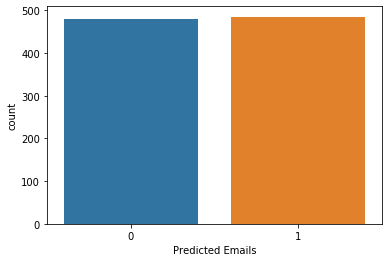

In [44]:
sns.countplot(x = "Predicted Emails", data = df1)
plt.show()


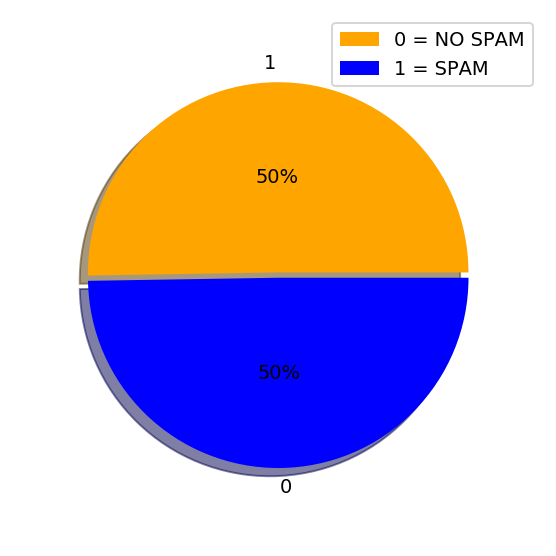

In [45]:
lb=df1["Predicted Emails"].value_counts().index.tolist()
val=df1["Predicted Emails"].value_counts().values.tolist()
exp=(0.025,0)
clr=('orange','blue')
plt.figure(figsize=(10,5),dpi=140)
plt.pie(x=val,explode=exp,labels=lb,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.legend(["0 = NO SPAM",'1 = SPAM'])
plt.show()

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
print(accuracy_score(Y_test,Y_pred))

0.9937823834196892


In [48]:
joblib.dump(model,"xgboost.pkl")

['xgboost.pkl']